In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


Data Preprocessing: Check if the data requires any preprocessing. Look for outliers or irrelevant variables that could be skewing the results. If your data contains categorical variables, consider using one-hot encoding to represent them.

Feature Engineering: You might be able to create new features that can provide additional useful information for your model.

Model Selection: Try different models and see which one performs the best. Ensemble methods like Random Forests and Gradient Boosting usually perform well on a wide range of problems.

Hyperparameter Tuning: Try adjusting the parameters of your model. This could include the learning rate, the number of estimators, the maximum depth of trees, etc.

Cross Validation: Use cross validation to get a more accurate estimate of your model's performance. This involves splitting your training data into several subsets and training your model on each subset.

Handling Imbalanced Data: If your data is imbalanced, it could impact the performance of your model. You can use techniques like oversampling the minority class, undersampling the majority class, or generating synthetic samples.

In [70]:
# Load the data
df = pd.read_csv('starcraft_player_data.csv')

# EDA
print(df.head())
print(df.info())


   GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
0      52            5  27           10       3000  143.7180         0.003515   
1      55            5  23           10       5000  129.2322         0.003304   
2      56            4  30           10        200   69.9612         0.001101   
3      57            3  19           20        400  107.6016         0.001034   
4      58            3  32           10        500  122.8908         0.001136   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0         0.000220              7        0.000110            0.000392   
1         0.000259              4        0.000294            0.000432   
2         0.000336              4        0.000294            0.000461   
3         0.000213              1        0.000053            0.000543   
4         0.000327              2        0.000000            0.001329   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.0

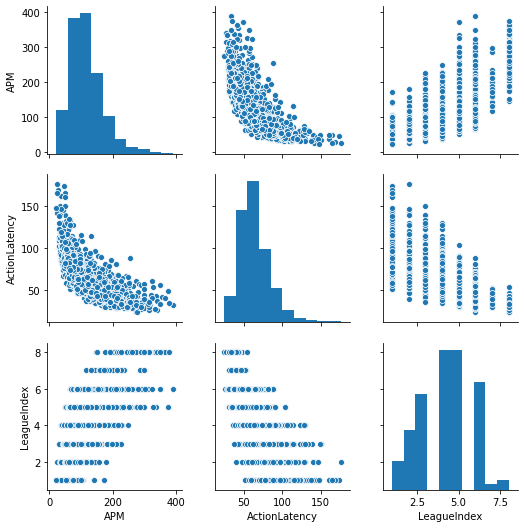

In [71]:
# Handle missing values (if any)
df = df.dropna() 
import seaborn as sns

# Selecting a subset of variables
variables = ['APM', 'Age', 'HoursPerWeek', 'TotalHours', 'ActionLatency','LeagueIndex']
df_subset = df[variables]

# Creating the pairplot
sns.pairplot(df_subset)
plt.show()


In [72]:
# summary statistics
print(df.describe().mean())

league_counts = df['LeagueIndex'].value_counts()
print(league_counts)


GameID                  4439.244653
LeagueIndex              427.712678
APM                      538.323005
SelectByHotkeys          424.382695
AssignToHotkeys          424.375426
UniqueHotkeys            428.090623
MinimapAttacks           424.375430
MinimapRightClicks       424.375718
NumberOfPACs             424.377910
GapBetweenPACs           476.287060
ActionLatency            482.937959
ActionsInPAC             429.720847
TotalMapExplored         444.195423
WorkersMade              424.376203
UniqueUnitsMade          429.673965
ComplexUnitsMade         424.375145
ComplexAbilitiesUsed     424.375462
dtype: float64
4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64


From the SNS plots above we can infer the following trends:

1. Higher variance in Action Latency attributed to lower League Index

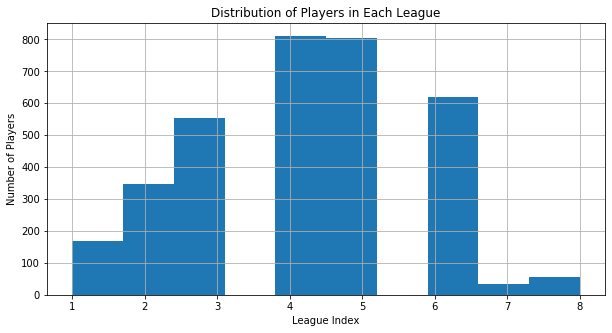

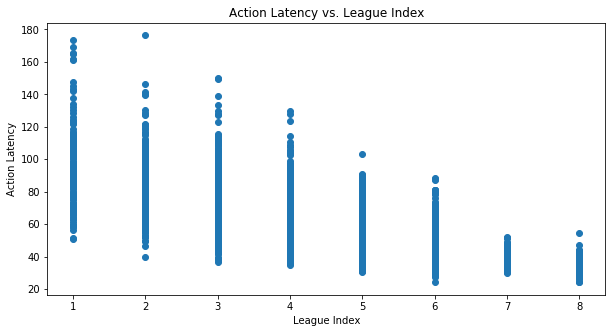

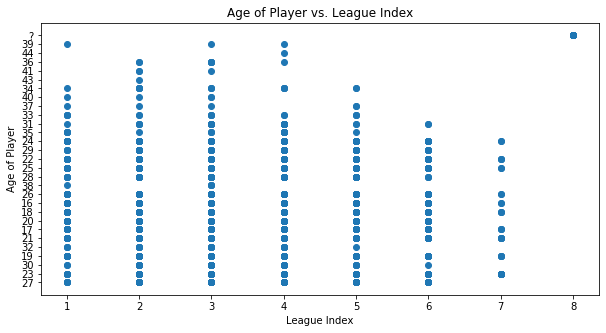

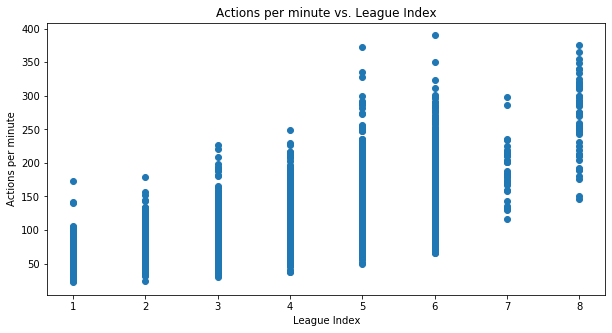

In [73]:
import matplotlib.pyplot as plt

# Distribution of players within each league
plt.figure(figsize=(10,5))
plt.title('Distribution of Players in Each League')
df['LeagueIndex'].hist()
plt.xlabel('League Index')
plt.ylabel('Number of Players')
plt.show()

# ActionLatency vs LeagueIndex
plt.figure(figsize=(10,5))
plt.title('Action Latency vs. League Index')
plt.scatter(df['LeagueIndex'], df['ActionLatency'])
plt.xlabel('League Index')
plt.ylabel('Action Latency')
plt.show()

# Age of Player vs LeagueIndex
plt.figure(figsize=(10,5))
plt.title('Age of Player vs. League Index')
plt.scatter(df['LeagueIndex'], df['Age'])
plt.xlabel('League Index')
plt.ylabel('Age of Player')
plt.show()

# Actions per minuter vs LeagueIndex
plt.figure(figsize=(10,5))
plt.title('Actions per minute vs. League Index')
plt.scatter(df['LeagueIndex'], df['APM'])
plt.xlabel('League Index')
plt.ylabel('Actions per minute')
plt.show()


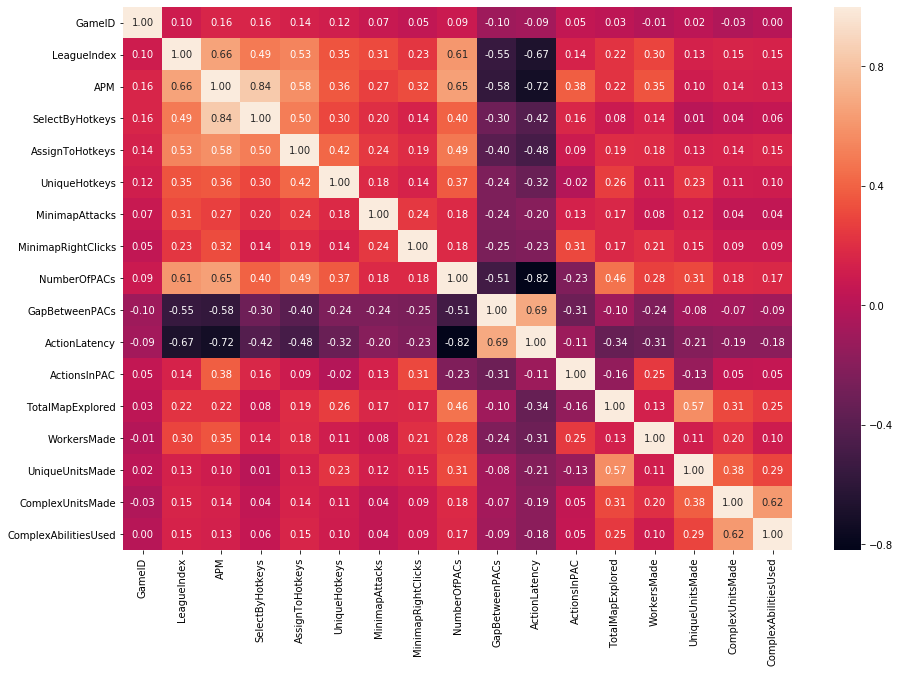

In [74]:
# Plot correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()





In [75]:
df = df.drop(columns='ActionsInPAC')
df.replace('?', np.nan, inplace=True)

# Convert columns to their appropriate data types 
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
    

df.fillna(df.mean(), inplace=True)

# Split data into features and target


X = df.drop('LeagueIndex', axis=1)
y = df['LeagueIndex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model and train it
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)


# Sort the feature importance in descending order
sorted_importances = feature_importance.sort_values(ascending=False)

print("Sorted feature importances:\n", sorted_importances)



              precision    recall  f1-score   support

           1       0.46      0.39      0.42        31
           2       0.44      0.28      0.34        80
           3       0.33      0.28      0.30       112
           4       0.34      0.44      0.39       167
           5       0.41      0.44      0.43       158
           6       0.59      0.58      0.59       117
           7       0.00      0.00      0.00         4
           8       1.00      1.00      1.00        10

    accuracy                           0.42       679
   macro avg       0.45      0.43      0.43       679
weighted avg       0.42      0.42      0.42       679

Sorted feature importances:
 ActionLatency           0.095752
APM                     0.082654
NumberOfPACs            0.074734
TotalHours              0.069823
SelectByHotkeys         0.069531
GapBetweenPACs          0.069452
GameID                  0.066741
AssignToHotkeys         0.064982
WorkersMade             0.059114
MinimapAttacks         

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# Load the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


starcraft_df = pd.read_csv('starcraft_player_data.csv')
starcraft_df = starcraft_df.drop(columns='ActionsInPAC')

# Impute missing values with the mean
starcraft_df.fillna(starcraft_df.mean(), inplace=True)

# Initialize the feature selection object
logreg = LogisticRegression()

# Set number of features to select
n_features = 6

# Create the RFE object and rank each pixel
rfe = RFE(estimator=logreg, n_features_to_select=n_features, step=1)
rfe = rfe.fit(X_train, y_train)

# Create a DataFrame with features and their ranks
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})

print(feature_ranking.sort_values('Rank'))

# Select the features by masking
selected_features = X_train.columns[rfe.support_]
print("Selected Features: ", selected_features)

# Fit the model using only selected features
logreg.fit(X_train[selected_features], y_train)

# Evaluate the model
y_pred = logreg.predict(X_test[selected_features])

print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (

                 Feature  Rank
1                    Age     1
2           HoursPerWeek     1
4                    APM     1
11        GapBetweenPACs     1
12         ActionLatency     1
13      TotalMapExplored     1
3             TotalHours     2
15       UniqueUnitsMade     3
0                 GameID     4
7          UniqueHotkeys     5
5        SelectByHotkeys     6
10          NumberOfPACs     7
14           WorkersMade     8
6        AssignToHotkeys     9
9     MinimapRightClicks    10
8         MinimapAttacks    11
17  ComplexAbilitiesUsed    12
16      ComplexUnitsMade    13
Selected Features:  Index(['Age', 'HoursPerWeek', 'APM', 'GapBetweenPACs', 'ActionLatency',
       'TotalMapExplored'],
      dtype='object')
              precision    recall  f1-score   support

           1       0.56      0.32      0.41        31
           2       0.34      0.23      0.27        80
           3       0.30      0.21      0.25       112
           4       0.31      0.43      0.36       16

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [80]:


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the model architecture
modelnn = Sequential()
modelnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer
modelnn.add(Dense(64, activation='relu')) # Hidden layer
modelnn.add(Dense(y_train_categorical.shape[1], activation='softmax')) # Output layer

# Compile the model
modelnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
modelnn.fit(X_train, y_train_categorical, epochs=100, batch_size=32)

# Evaluate the model
print(classification_report(y_test, y_pred))
scores = modelnn.evaluate(X_test, y_test_categorical)
print("\n%s: %.2f%%" % (modelnn.metrics_names[1], scores[1]*100))


Epoch 1/100
2716/2716 [==============================] - 1s 277us/step - loss: 80.4611 - accuracy: 0.2228
Epoch 2/100
2716/2716 [==============================] - 0s 69us/step - loss: 20.5955 - accuracy: 0.2570
Epoch 3/100
2716/2716 [==============================] - 0s 69us/step - loss: 20.6785 - accuracy: 0.2662
Epoch 4/100
2716/2716 [==============================] - 0s 70us/step - loss: 20.7372 - accuracy: 0.2599
Epoch 5/100
2716/2716 [==============================] - 0s 70us/step - loss: 21.4529 - accuracy: 0.2401
Epoch 6/100
2716/2716 [==============================] - 0s 69us/step - loss: 33.0278 - accuracy: 0.2625
Epoch 7/100
2716/2716 [==============================] - 0s 69us/step - loss: 19.6636 - accuracy: 0.2784
Epoch 8/100
2716/2716 [==============================] - 0s 70us/step - loss: 15.0375 - accuracy: 0.2758
Epoch 9/100
2716/2716 [==============================] - 0s 70us/step - loss: 17.0677 - accuracy: 0.2658
Epoch 10/100
2716/2716 [==============================

2716/2716 [==============================] - 0s 75us/step - loss: 8.3408 - accuracy: 0.2986
Epoch 79/100
2716/2716 [==============================] - 0s 75us/step - loss: 5.8261 - accuracy: 0.3141
Epoch 80/100
2716/2716 [==============================] - 0s 75us/step - loss: 5.4487 - accuracy: 0.3170
Epoch 81/100
2716/2716 [==============================] - 0s 74us/step - loss: 6.3552 - accuracy: 0.2986
Epoch 82/100
2716/2716 [==============================] - 0s 75us/step - loss: 4.7075 - accuracy: 0.3200
Epoch 83/100
2716/2716 [==============================] - 0s 75us/step - loss: 4.8671 - accuracy: 0.3108
Epoch 84/100
2716/2716 [==============================] - 0s 75us/step - loss: 4.3189 - accuracy: 0.3270
Epoch 85/100
2716/2716 [==============================] - 0s 74us/step - loss: 5.1993 - accuracy: 0.2997
Epoch 86/100
2716/2716 [==============================] - 0s 75us/step - loss: 3.9055 - accuracy: 0.3299
Epoch 87/100
2716/2716 [==============================] - 0s 97us/st

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


679/679 [==============================] - 0s 460us/step

accuracy: 30.93%


ENSEMBLE OF MODEL 1 AND MODEL 2:

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# create a dictionary of our models
estimators=[('log_reg', logreg), ('rf', model)]

# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

# fit model to training data
ensemble.fit(X_train, y_train)

# Predict test data
y_pred = ensemble.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           1       0.31      0.45      0.37        31
           2       0.44      0.17      0.25        80
           3       0.31      0.30      0.31       112
           4       0.36      0.51      0.42       167
           5       0.41      0.39      0.40       158
           6       0.54      0.46      0.50       117
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        10

    accuracy                           0.39       679
   macro avg       0.30      0.29      0.28       679
weighted avg       0.39      0.39      0.38       679



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
